In [1]:
%matplotlib inline

In [242]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
import pylab
import os
matplotlib.style.use('ggplot')

OUTPUT_DIR = r'/Users/guydavidson/Documents/CS111/population_modeling_assignment'

In [245]:
LATEX_FIGURE_FORMAT_SINGLE_SPECIE = """
\\begin{{figure}}[ht]
\t\\includegraphics[width=0.85\\textwidth]{{{name}}}
\t\\caption{{Plot of single specie system with parameters $K = {K}, r \\in {r_values}, x_0 \\in {x_0_values}$}}
\\end{{figure}}
"""

from itertools import product
t_0 = 0
t_f = 10
t_steps = 100 * t_f
TIME_VALUES = np.linspace(t_0, t_f, t_steps)
def plot_single_specie(K, r_values, x_0_values, time_values=TIME_VALUES, output_dir=OUTPUT_DIR):
    K = float(K)
    
    plt.figure(figsize=(12, 9), dpi=800)
    plt.axhline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.axvline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.xlabel('Time $[T]$')
    plt.ylabel('Species population $[N_X]$')
    title_format = r'Single-Species Growth Model for $K = {K}$ over multiple values of $r$ and $x_0$'
    plt.title(title_format.format(K=K))
    
    colors = pylab.cm.autumn_r(np.linspace(0.3, 1., len(r_values) * len(x_0_values)))
    
    for (r, x_0), color in zip(product(r_values, x_0_values), colors) :
        r = float(r)
        x_0 = float(x_0)
    
        def X_t(t):
            return K / (1.0 + (K / x_0 - 1) * np.exp(-1 * r * t))
    
        plt.plot(time_values, X_t(time_values), lw=3, color=color, alpha=0.75, 
                 label=r'$r={r}, x_0={x_0}$'.format(r=r, x_0=x_0))
    
    plt.hlines(K, t_0, t_f, lw=3, linestyles='dashed', color='black', alpha=0.66,
              label='Late time behavior $K={K}$'.format(K=K))

    plt.legend(loc=0)
    
    figure_name = 'plot_single_specie_K_{K}'.format(K=K).replace('.', '_') + '.png'
    figure_path = os.path.join(output_dir, figure_name)
    plt.savefig(figure_path, bbox_inches='tight')
    
    plt.show()
    print LATEX_FIGURE_FORMAT_SINGLE_SPECIE.format(name=figure_name, K=K, r_values=r_values, x_0_values=x_0_values)



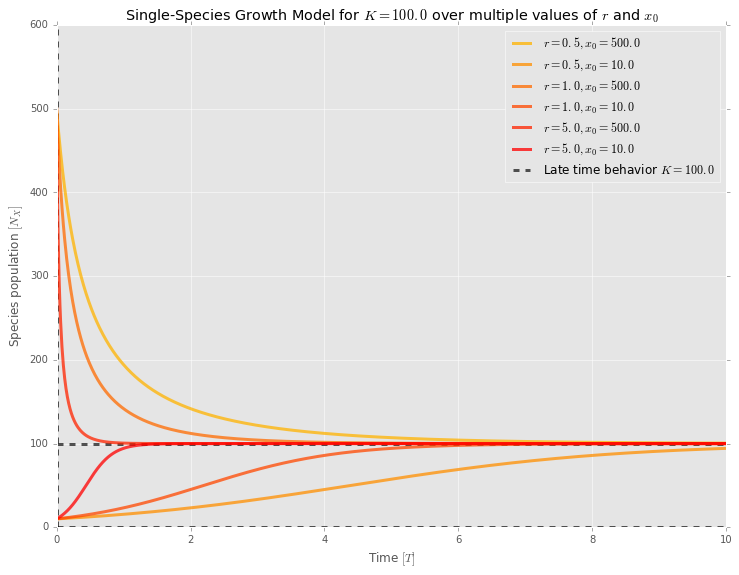


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_single_specie_K_100_0.png}
	\caption{Plot of single specie system with parameters $K = 100.0, r \in [0.5, 1, 5], x_0 \in [500, 10]$}
\end{figure}



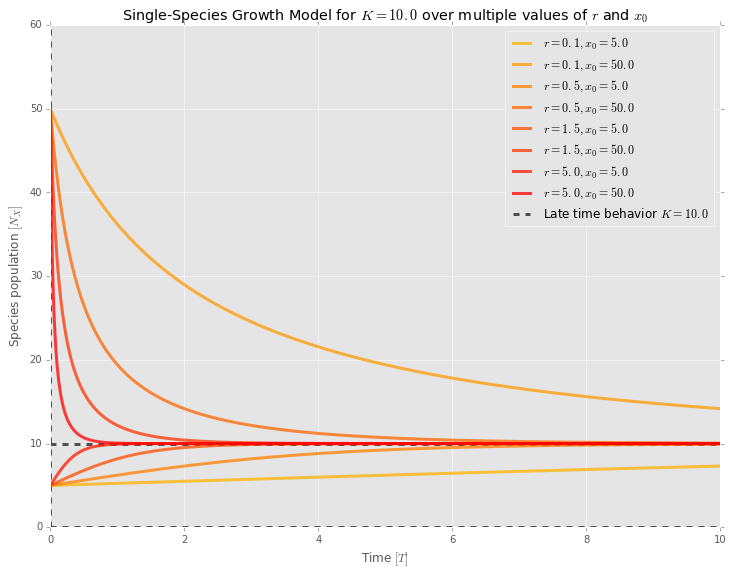


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_single_specie_K_10_0.png}
	\caption{Plot of single specie system with parameters $K = 10.0, r \in [0.1, 0.5, 1.5, 5], x_0 \in [5, 50]$}
\end{figure}



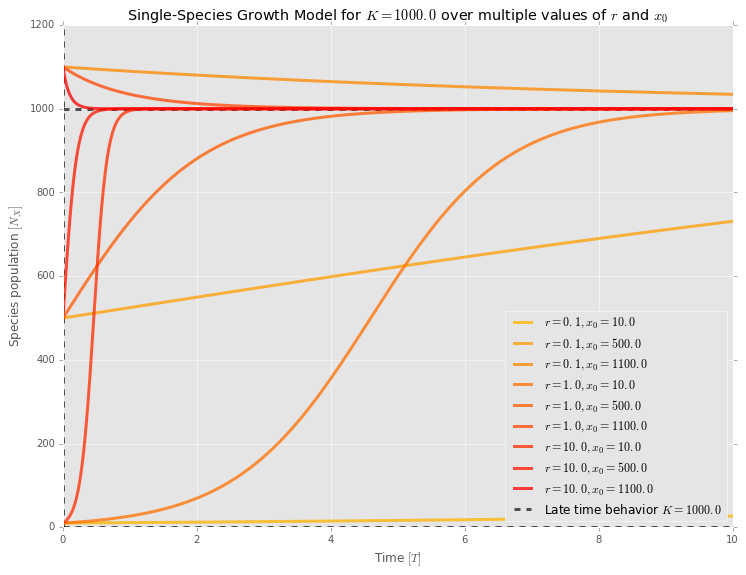


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_single_specie_K_1000_0.png}
	\caption{Plot of single specie system with parameters $K = 1000.0, r \in [0.1, 1, 10], x_0 \in [10, 500, 1100]$}
\end{figure}



In [246]:
plot_single_specie(100, [0.5, 1, 5], [500, 10])

plot_single_specie(10, [0.1, 0.5, 1.5, 5], [5, 50])

plot_single_specie(1000, [0.1, 1, 10], [10, 500, 1100])

In [218]:
# X = [u, v] describes both populations
T_0 = 0
T_f = 50
T_steps = 100 * T_f
TAU_VALUES = np.linspace(T_0, T_f, T_steps)

MIN_AXIS_MAX_VALUE = 1.2
NUM_PHASE_ARROWS = 20
X_0_VALUES = [np.array([1.0, 1.0]), np.array([1.0, 0.66]), np.array([1.0, 0.33]), 
              np.array([1.0, 0.05]), np.array([0.66, 1.0]), 
              np.array([0.33, 1.0]), np.array([0.05, 1.0])]
PLOT_COLORS = pylab.cm.autumn_r(np.linspace(0.3, 1., len(X_0_VALUES)))
FIXED_EQUILIBRIA = [(0, 0), (1, 0), (0, 1)]

LATEX_FIGURE_FORMAT = """
\\begin{{figure}}[ht]
\t\\includegraphics[width=0.90\\textwidth]{{{name}}}
\t\\caption{{Plot of system with parameters $\\tilde{{\\alpha}} = {alpha}, \\tilde{{\\beta}} = {beta}, \\tilde{{r}} = {r}$}}
\\end{{figure}}
""" 

def model_growth_and_plot(alpha, beta, r, tau_values=TAU_VALUES, 
                          X_0_values=X_0_VALUES, colors=PLOT_COLORS, output_dir=OUTPUT_DIR):
    alpha = float(alpha)
    beta = float(beta)
    r = float(r)
    
    def dX_dtau(X, t=0):
        u, v = X
        return np.array([u - u ** 2 - alpha * u * v,
                     r * (v - v ** 2) - beta * u * v])
    
    plt.figure(figsize=(12, 9), dpi=800)
    plt.axhline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.axvline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.xlabel('U species population')
    plt.ylabel('V species population') 
    title_format = r'Species Interaction Growth Model for ' + \
                r'$\tilde{{\alpha}} = {alpha}, \tilde{{\beta}} = {beta}, \tilde{{r}} = {r}$'
    plt.title(title_format.format(alpha=alpha, beta=beta, r=r))

    for X_0, color in zip(X_0_values, colors):
        X, infodict = integrate.odeint(dX_dtau, X_0, tau_values, full_output=True)
        if 'Integration successful.' != infodict['message']:
            raise ValueError('Integration failed')

        u, v = X.T
        plt.plot(u ,v, lw=3, color=color, alpha=0.75, label='X0=({X_0[0]}, {X_0[1]})'.format(X_0=X_0))

    u_max = plt.xlim(xmin=-0.1, xmax=max(MIN_AXIS_MAX_VALUE, plt.xlim()[1]))[1]
    v_max = plt.ylim(ymin=-0.1, ymax=max(MIN_AXIS_MAX_VALUE, plt.ylim()[1]))[1]

    u_range = np.linspace(0, u_max, NUM_PHASE_ARROWS)
    v_range = np.linspace(0, v_max, NUM_PHASE_ARROWS)

    u_grid, v_grid = np.meshgrid(u_range, v_range)
    du, dv = dX_dtau([u_grid, v_grid])
    norm_du_dv = np.hypot(du, dv)
    norm_du_dv[norm_du_dv == 0] = 1 # we normalize by the norm, so avoid division by zero
    du /= norm_du_dv
    dv /= norm_du_dv
    plt.quiver(u_range, v_range, du, dv, norm_du_dv, pivot='mid', cmap=pylab.cm.jet)
    
        
    equilibrium = (r * (alpha - 1) / (alpha * beta - r), (beta - r) / (alpha * beta - r))
    print 'The non-fixed equilibrium point is ({eq[0]:.3f}, {eq[1]:.3f})'.format(eq=equilibrium)
    equilibria_u, equilibria_v = zip(*(FIXED_EQUILIBRIA + [equilibrium]))
    plt.plot(equilibria_u, equilibria_v, 'o', ms=15.0, alpha=0.66, color='g', label='Equilibria')
    plt.legend(loc=1)
    
    figure_name = 'plot_alpha_{alpha}_beta_{beta}_r_{r}'.format(alpha=alpha, beta=beta, r=r).replace('.', '_') + '.png'
    figure_path = os.path.join(output_dir, figure_name)
    plt.savefig(figure_path, bbox_inches='tight')
    
    plt.show()
    print LATEX_FIGURE_FORMAT.format(name=figure_name, alpha=alpha, beta=beta, r=r)



The non-fixed equilibrium point is (0.310, 0.069)


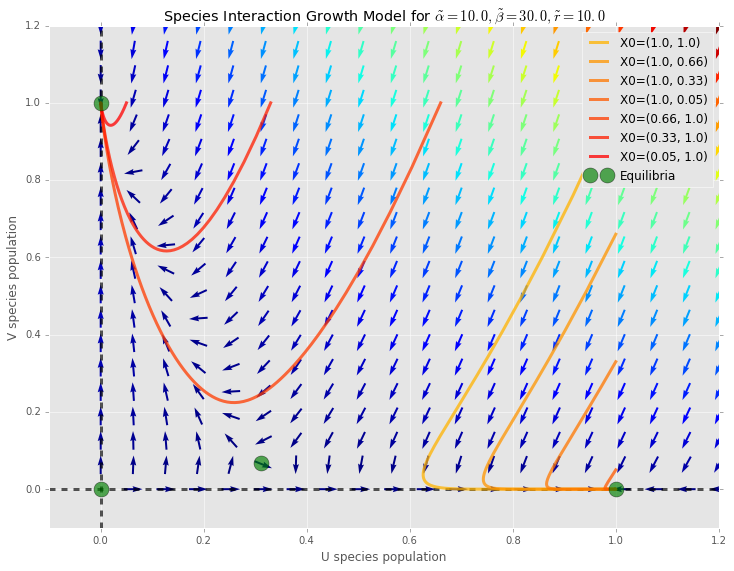


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_10_0_beta_30_0_r_10_0.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 10.0, \tilde{\beta} = 30.0, \tilde{r} = 10.0$}
\end{figure}

The non-fixed equilibrium point is (1.000, 0.000)


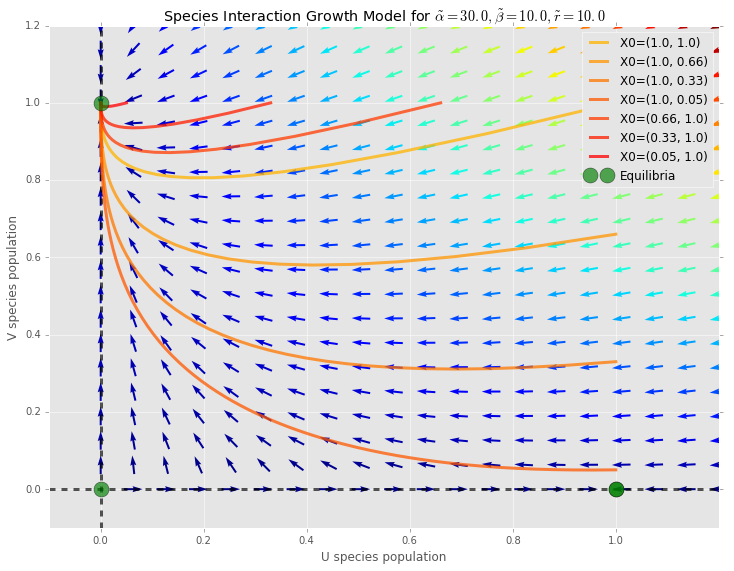


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_30_0_beta_10_0_r_10_0.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 30.0, \tilde{\beta} = 10.0, \tilde{r} = 10.0$}
\end{figure}

The non-fixed equilibrium point is (3.857, -0.286)


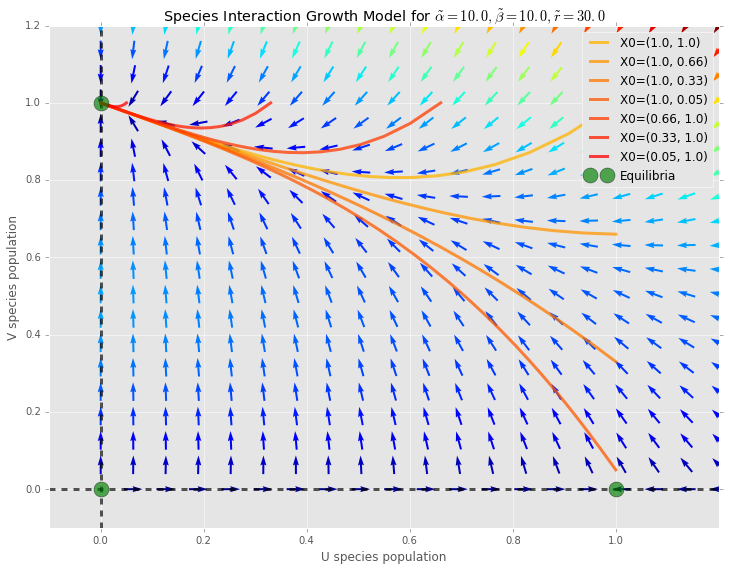


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_10_0_beta_10_0_r_30_0.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 10.0, \tilde{\beta} = 10.0, \tilde{r} = 30.0$}
\end{figure}

The non-fixed equilibrium point is (1.000, 0.000)


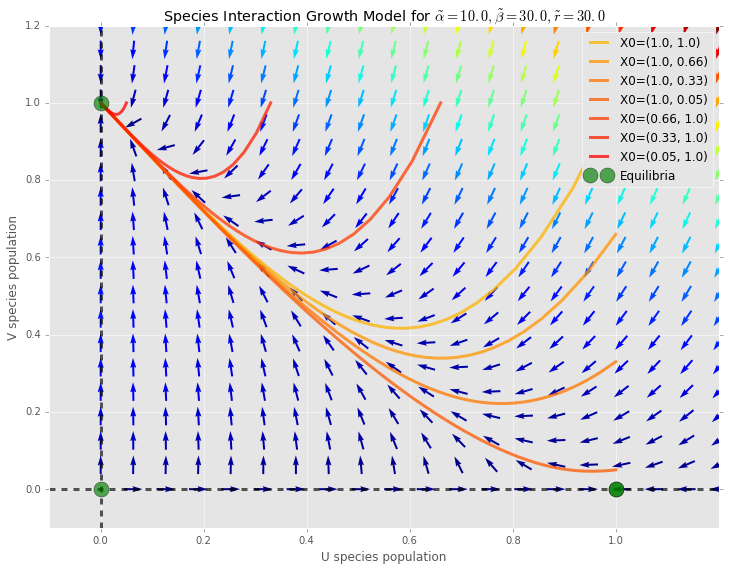


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_10_0_beta_30_0_r_30_0.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 10.0, \tilde{\beta} = 30.0, \tilde{r} = 30.0$}
\end{figure}

The non-fixed equilibrium point is (3.222, -0.074)


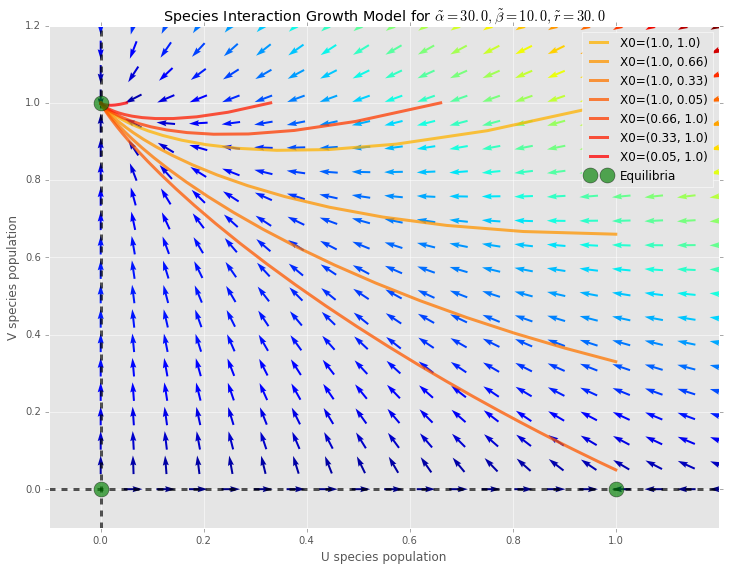


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_30_0_beta_10_0_r_30_0.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 30.0, \tilde{\beta} = 10.0, \tilde{r} = 30.0$}
\end{figure}

The non-fixed equilibrium point is (0.326, 0.022)


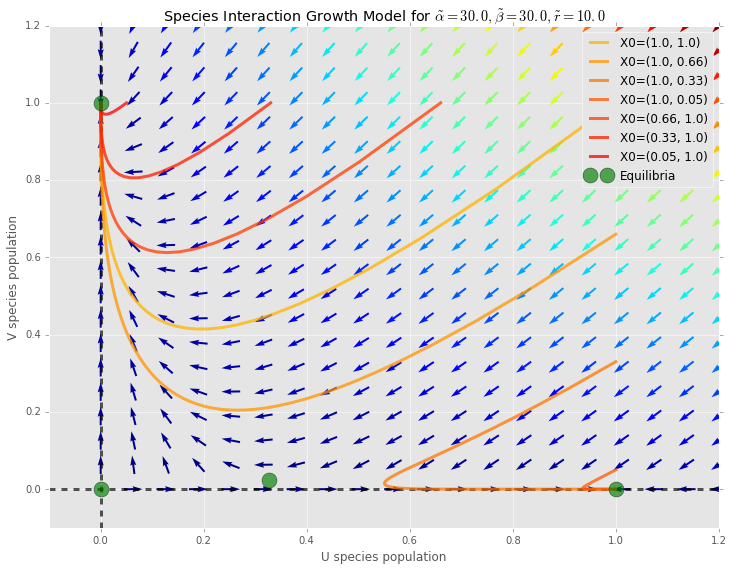


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_30_0_beta_30_0_r_10_0.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 30.0, \tilde{\beta} = 30.0, \tilde{r} = 10.0$}
\end{figure}

The non-fixed equilibrium point is (1.000, 0.000)


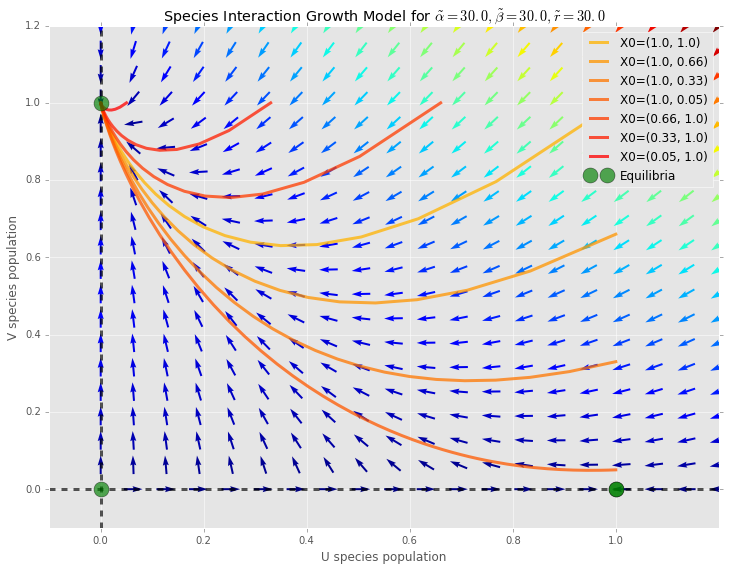


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_30_0_beta_30_0_r_30_0.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 30.0, \tilde{\beta} = 30.0, \tilde{r} = 30.0$}
\end{figure}

The non-fixed equilibrium point is (0.003, 0.100)


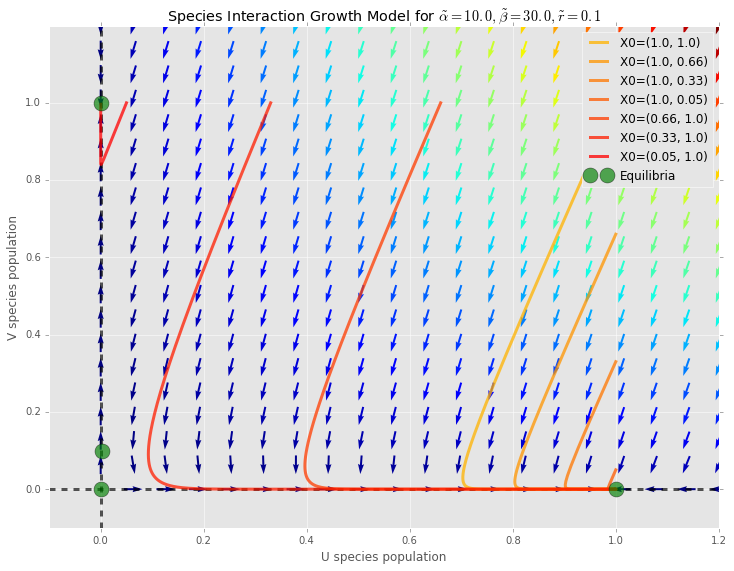


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_10_0_beta_30_0_r_0_1.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 10.0, \tilde{\beta} = 30.0, \tilde{r} = 0.1$}
\end{figure}

The non-fixed equilibrium point is (0.010, 0.033)


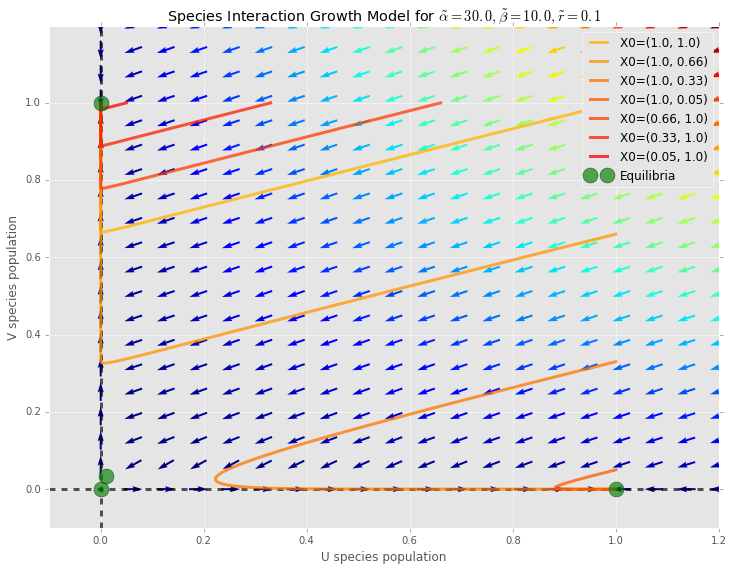


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_30_0_beta_10_0_r_0_1.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 30.0, \tilde{\beta} = 10.0, \tilde{r} = 0.1$}
\end{figure}



In [182]:
model_growth_and_plot(10, 30, 10)
model_growth_and_plot(30, 10, 10)
model_growth_and_plot(10, 10, 30)
model_growth_and_plot(10, 30, 30)
model_growth_and_plot(30, 10, 30)
model_growth_and_plot(30, 30, 10)
model_growth_and_plot(30, 30, 30)
model_growth_and_plot(10, 30, 0.1)
model_growth_and_plot(30, 10, 0.1)

The non-fixed equilibrium point is (0.714, 0.143)


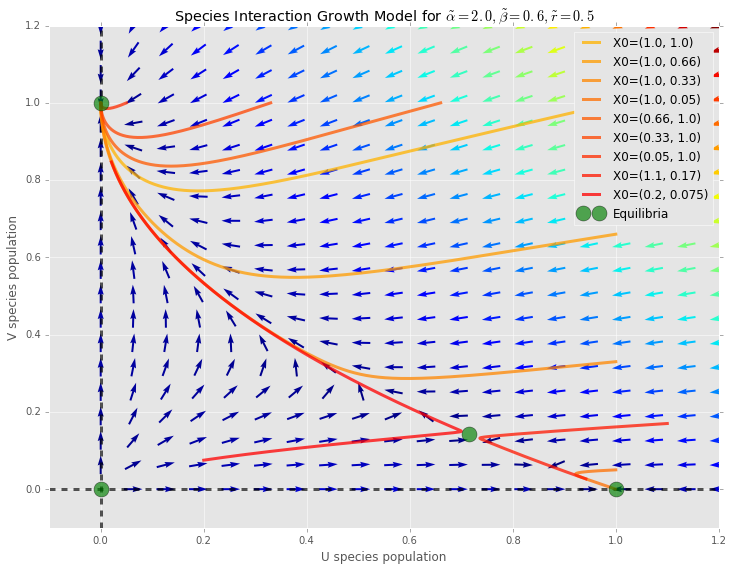


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{plot_alpha_2_0_beta_0_6_r_0_5.png}
	\caption{Plot of system with parameters $\tilde{\alpha} = 2.0, \tilde{\beta} = 0.6, \tilde{r} = 0.5$}
\end{figure}



In [187]:
initial_values = X_0_VALUES + [np.array([1.1, 0.17]), np.array([0.2, 0.075])]
colors = pylab.cm.autumn_r(np.linspace(0.3, 1., len(initial_values)))
model_growth_and_plot(2, 0.6, 0.5, X_0_values=initial_values, colors=colors)


In [202]:
DEFAULT_RANGE_AROUND_EQ = 1.0 # 0.25 #
MIN_VALUE =  -1.0 # -0.01 #

alpha_hat = 2.0 # 0.5 #
beta_hat = 3.0 # 0.5 #
r_hat = 2.0 # 0.66 #

LATEX_FIGURE_FORMAT_EQUILIBRIUM = """
\\begin{{figure}}[ht]
\t\\includegraphics[width=0.90\\textwidth]{{{name}}}
\t\\caption{{Phase plane of system with parameters $\\tilde{{\\alpha}} = {alpha}, \\tilde{{\\beta}} = {beta}, 
    \\tilde{{r}} = {r}$ around the equilibrium point $(u_{{eq}}, v_{{eq}}) = ({eq[0]}, {eq[1]})$}}
\\end{{figure}}
""" 


def phase_around_equilibrium(eq, linearized_dX_dtau, u_value_nullclines, v_value_nullclines,
                             function_of_u_nullclines=[], range_around_eq=DEFAULT_RANGE_AROUND_EQ,
                             output_dir=OUTPUT_DIR):
    
    plt.figure(figsize=(12, 9), dpi=800)
    plt.axhline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.axvline(0, lw=3, ls='dashed', color='black', alpha=0.66)
    plt.xlabel('U species population')
    plt.ylabel('V species population') 
    title_format = r'Phase Portrait for Linearized System around $(u_{{eq}}, v_{{eq}}) = ({eq[0]}, {eq[1]})$'
    plt.title(title_format.format(eq=eq))

    #u_max = plt.xlim(xmin=-0.1, xmax=max(MIN_AXIS_MAX_VALUE, plt.xlim()[1]))[1]
    #v_max = plt.ylim(ymin=-0.1, ymax=max(MIN_AXIS_MAX_VALUE, plt.ylim()[1]))[1]    
    
    u_min, u_max = plt.xlim(xmin=max(MIN_VALUE, eq[0] - range_around_eq), xmax=eq[0] + range_around_eq)
    v_min, v_max = plt.ylim(ymin=max(MIN_VALUE, eq[1] - range_around_eq), ymax=eq[1] + range_around_eq)
    u_range = np.linspace(u_min, u_max, NUM_PHASE_ARROWS)
    v_range = np.linspace(v_min, v_max, NUM_PHASE_ARROWS)
    
    print u_min, u_max, u_range
    print v_min, v_max, v_range

    for u_value in u_value_nullclines:
        plt.plot([u_value] * len(v_range), v_range, lw=3, color='black', alpha=0.75, 
                 label='Nullcline $u={u_value}$'.format(u_value=u_value))
    
    for v_value in v_value_nullclines:
        plt.plot(u_range, [v_value] * len(u_range), lw=3, color='black', alpha=0.75, 
                 label='Nullcline $v={v_value}$'.format(v_value=v_value))
    
    for nullcline_func, label in function_of_u_nullclines:
        plt.plot(u_range, nullcline_func(u_range), lw=3, color='black', alpha=0.75, label=label)

    # TODO: receive dX_dtau as argument to function
        
    u_grid, v_grid = np.meshgrid(u_range, v_range)
    du, dv = linearized_dX_dtau([u_grid, v_grid])
    norm_du_dv = np.hypot(du, dv)
    norm_du_dv[norm_du_dv == 0] = 1 # we normalize by the norm, so avoid division by zero
    du /= norm_du_dv
    dv /= norm_du_dv
    plt.quiver(u_range, v_range, du, dv, norm_du_dv, pivot='mid', cmap=pylab.cm.jet)
    
    plt.plot(eq[0], eq[1], 'o', ms=15.0, alpha=0.66, color='g', label='Equilibrium')
    plt.legend(loc=1)
    
    figure_name = 'equilibrium_phase_portrait_arond_{eq[0]}_{eq[1]}'.format(eq=eq).replace('.', '_') + '.png'
    figure_path = os.path.join(output_dir, figure_name)
    plt.savefig(figure_path, bbox_inches='tight')
    
    plt.show()
    print LATEX_FIGURE_FORMAT_EQUILIBRIUM.format(name=figure_name, alpha=alpha_hat, beta=beta_hat, r=r_hat, eq=eq)

-1.0 1.0 [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
-1.0 1.0 [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


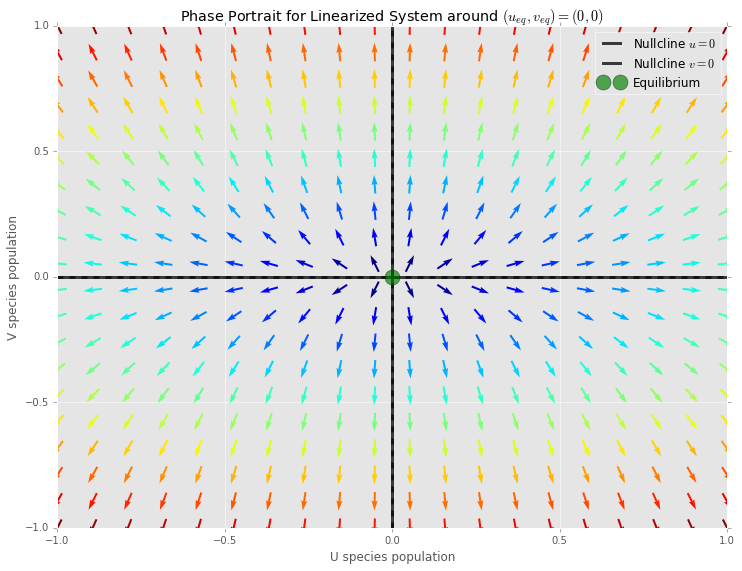


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{equilibrium_phase_portrait_arond_0_0.png}
	\caption{Phase plane of system with parameters $\tilde{\alpha} = 2.0, \tilde{\beta} = 3.0, 
    \tilde{r} = 2.0$ around the equilibrium point $(u_{eq}, v_{eq}) = (0, 0)$}
\end{figure}

-1.0 1.0 [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]
0.0 2.0 [ 0.          0.10526316  0.21052632  0.31578947  0.42105263  0.52631579
  0.63157895  0.73684211  0.84210526  0.94736842  1.05263158  1.15789474
  1.26315789  1.36842105  1.47368421  1.57894737  1.68421053  1.78947368
  1.89473684  2.        ]


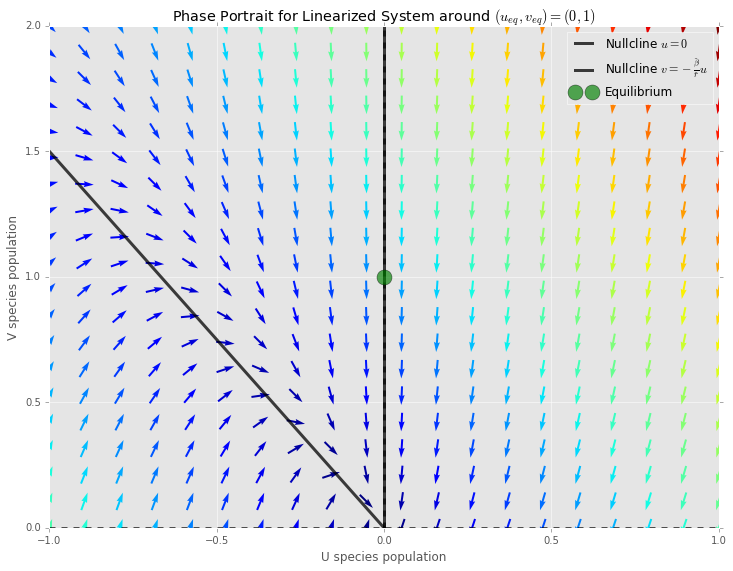


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{equilibrium_phase_portrait_arond_0_1.png}
	\caption{Phase plane of system with parameters $\tilde{\alpha} = 2.0, \tilde{\beta} = 3.0, 
    \tilde{r} = 2.0$ around the equilibrium point $(u_{eq}, v_{eq}) = (0, 1)$}
\end{figure}

0.0 2.0 [ 0.          0.10526316  0.21052632  0.31578947  0.42105263  0.52631579
  0.63157895  0.73684211  0.84210526  0.94736842  1.05263158  1.15789474
  1.26315789  1.36842105  1.47368421  1.57894737  1.68421053  1.78947368
  1.89473684  2.        ]
-1.0 1.0 [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


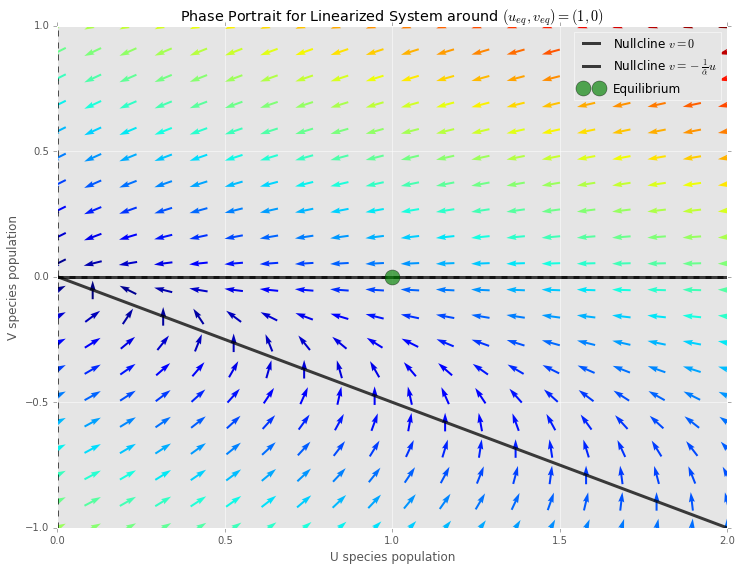


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{equilibrium_phase_portrait_arond_1_0.png}
	\caption{Phase plane of system with parameters $\tilde{\alpha} = 2.0, \tilde{\beta} = 3.0, 
    \tilde{r} = 2.0$ around the equilibrium point $(u_{eq}, v_{eq}) = (1, 0)$}
\end{figure}

-0.5 1.5 [-0.5        -0.39473684 -0.28947368 -0.18421053 -0.07894737  0.02631579
  0.13157895  0.23684211  0.34210526  0.44736842  0.55263158  0.65789474
  0.76315789  0.86842105  0.97368421  1.07894737  1.18421053  1.28947368
  1.39473684  1.5       ]
-0.75 1.25 [-0.75       -0.64473684 -0.53947368 -0.43421053 -0.32894737 -0.22368421
 -0.11842105 -0.01315789  0.09210526  0.19736842  0.30263158  0.40789474
  0.51315789  0.61842105  0.72368421  0.82894737  0.93421053  1.03947368
  1.14473684  1.25      ]


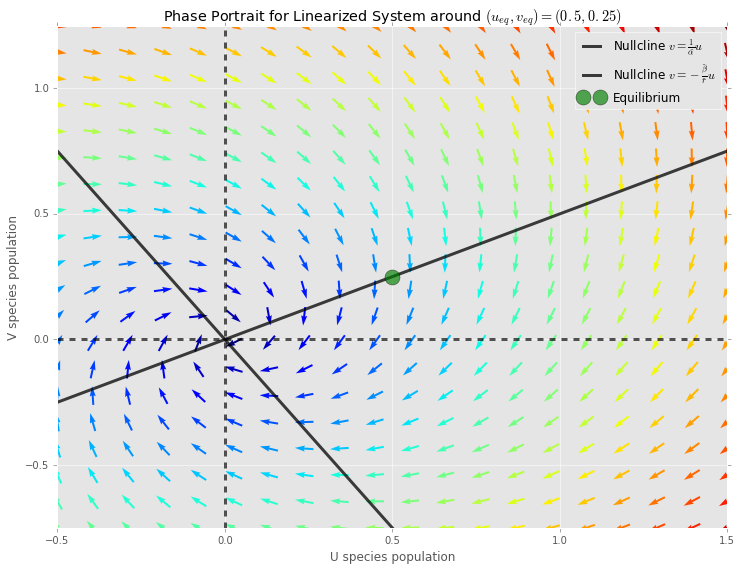


\begin{figure}[ht]
	\includegraphics[width=0.90\textwidth]{equilibrium_phase_portrait_arond_0_5_0_25.png}
	\caption{Phase plane of system with parameters $\tilde{\alpha} = 2.0, \tilde{\beta} = 3.0, 
    \tilde{r} = 2.0$ around the equilibrium point $(u_{eq}, v_{eq}) = (0.5, 0.25)$}
\end{figure}



In [203]:
def linearized_dX_dtau_0_0(X, t=0):
    u, v = X
    return np.array([u, r_hat * v])
phase_around_equilibrium((0, 0), linearized_dX_dtau_0_0, [0], [0])


def linearized_dX_dtau_0_1(X, t=0):
    u, v = X
    return np.array([(1.0 - alpha_hat) * u, 
                     -1 * beta_hat * u - r_hat * v])
phase_around_equilibrium((0, 1), linearized_dX_dtau_0_1, [0], [], 
                         [(lambda u: -1.0 * beta_hat / r_hat * u, 
                           r'Nullcline $v = -\frac{\tilde{\beta}}{\tilde{r}}u$')])


def linearized_dX_dtau_1_0(X, t=0):
    u, v = X
    return np.array([-1.0 * u - alpha_hat * v, 
                     (r_hat - beta_hat) * v])
phase_around_equilibrium((1, 0), linearized_dX_dtau_1_0, [], [0], 
                         [(lambda u: -1.0 / alpha_hat * u, 
                           r'Nullcline $v = -\frac{1}{\tilde{\alpha}}u$')])


def linearized_dX_dtau_special(X, t=0):
    u, v = X
    return np.array([(r_hat * (1.0 - alpha_hat) * (u - alpha_hat * v)) / (alpha_hat * beta_hat - r_hat), 
                    ((r_hat - beta_hat) * (beta_hat * u + r_hat * v)) / (alpha_hat * beta_hat - r_hat)])
phase_around_equilibrium((r_hat * (alpha_hat - 1.0) / (alpha_hat * beta_hat - r_hat), 
                         (beta_hat - r_hat) / (alpha_hat * beta_hat - r_hat)), 
                         linearized_dX_dtau_special, [], [], 
                         [(lambda u: 1.0 / alpha_hat * u, 
                           r'Nullcline $v = \frac{1}{\tilde{\alpha}}u$'),
                         (lambda u: -1.0 * beta_hat / r_hat * u, 
                           r'Nullcline $v = -\frac{\tilde{\beta}}{\tilde{r}}u$')])



In [ ]:
def d2X_dtau2(X, t=0):
    # The Jacobian matrix
    u, v = X
    return np.array([[1 - 2 * u - alpha_hat * v, -1 * alpha_hat * u],
                 [- 1 * beta_hat * v, r_hat * (1 - 2 * v) - beta_hat * u]])

148.4131591025766

In [227]:
plt.hlines?